In [3]:
from mnist import MNIST
from skimage.color import rgb2grey
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [12]:
# Download and import the mnist dataset and slpit into training and testing data
# The MNIST database contains 60,000 training images and 10,000 testing images of written numerical digits taken from American Census Bureau 
# The data-set is based on gray-scale images of handwritten digits and, each image is 28 pixel in height and 28 pixel in width. 
# Each pixel has a number associated with it, where 0 represents a dark pixel and, 255 represents a white pixel. 

mndata = MNIST(r"/Users/travisvolpe/Desktop/MSML_602_Project2")
mndata.gz=True
train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [13]:
train_images=np.array(train_images[0:1000]) 
train_labels=np.array(train_labels[0:1000]) 

In [14]:
# Combine the training data with the training labels
train_img = pd.DataFrame(train_images)
train_img['index'] = train_img.index
train_lbls = pd.DataFrame(train_labels)
train_lbls['index'] = train_lbls.index
train_lbls.columns= ['labels', 'index']
train = pd.merge(train_lbls, train_img, on='index')
train

,labels,index,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Combine the testing data with the testing labels
test_img = pd.DataFrame(test_images)
test_img['index'] = test_img.index
test_lbls = pd.DataFrame(test_labels)
test_lbls['index'] = test_lbls.index
test_lbls.columns= ['labels', 'index']
test = pd.merge(test_lbls, test_img, on='index')
test

,labels,index,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


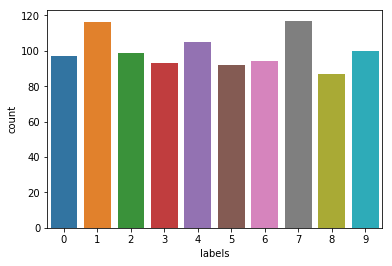

In [16]:
# Plot the count of each value
# This shows that their is slight bias in the data
# with 1 and 7 appearing more than 30% more than 5 and 8

sns.countplot(train['labels'])
plt.show()

In [17]:
# Create x & y varibles for the model
X_tr = train.iloc[:,2:] # iloc ensures X_tr will be a dataframe
y_tr = train.iloc[:, 0]
#X_tr

In [18]:
# Compute a train test split of the data with 20% of the data reserved for testing
# technically not necessary bc data already split 
X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr,test_size=0.2, random_state=30, stratify=y_tr)

# Support Vector Machines (SVMs)

SVM is a supervised linear machine learning algorithm which can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs. In order to accomplish this the alogirthm creates a line or a hyperplane which separates the data into classes. To compute the SVM algorithm we find the points closest to the line from both the classes, which are called support vectors. The distance between the lines and the support vectors (called the margin) is than computed. The optimal hyperplane that separates the data is the plane that maximizes the margin. In other words, SVM tries to make a decision boundary in such a way that the separation between the two classes is as wide as possible.



In [19]:
# Create a data pipeline for normalizing the pixel values (they range from zero to 255) and selecting a kernel. 
# StandarScaler is a sk-learn function that standardizes/normalizes the data by removing meaning and scalling the values
# to unit variance. The polynomial kernel was selected because it has the best score and least compute time of all kernels for the MNIST dataset.
 
# A pipeline is a sk-learn class that allows sticking multiple processes into a single scikit-learn estimator. 
# Pipelines sequentially apply a list of transforms and a final estimator. 
# Intermediate steps of pipeline must implement fit and transform methods and the final estimator only needs to implement fit.

model = [('scaler', StandardScaler()), ('SVM', SVC(kernel='poly'))]
pipeline = Pipeline(model)

In [20]:
parameters = {'SVM__C':[0.001, 0.1, 100, 10e5], 'SVM__gamma':[10,1,0.1,0.01]}
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [21]:
grid.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.parti

/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.parti

/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.parti

/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.parti

/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'SVM__C': [0.001, 0.1, 100, 1000000.0], 'SVM__gamma': [10, 1, 0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
print(grid.score(X_test, y_test))

0.875


/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


The accuracy is only ~88%(+/- 1%) which is relatively low (especially compared to the CNN or even human inspection) however this would likely improve if more training data was used. 

In [23]:
print(grid.best_params_)

{'SVM__C': 0.001, 'SVM__gamma': 10}


In [24]:
y_pred = grid.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


The best partameted for the model are ...

In [25]:
print(y_pred[100:105])
print(y_test[100:105])

[6 2 3 1 1]
299    6
252    2
983    3
174    1
593    1
Name: labels, dtype: uint8


In [26]:
for i in (np.random.randint(0,270,6)):
 two_d = (np.reshape(X_test.values[i], (28, 28)) * 255).astype(np.uint8)
 plt.title('predicted label: {0}'. format(y_pred[i]))
 plt.imshow(two_d, interpolation='nearest', cmap='gray')
 plt.show()

IndexError: index 208 is out of bounds for axis 0 with size 200

In [27]:
print("confusion matrix: \n ", confusion_matrix(y_test, y_pred))

confusion matrix: 
  [[16  0  0  0  0  1  0  1  1  0]
 [ 0 23  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  1  0  0  0  3  0]
 [ 0  0  0 16  1  0  0  0  2  0]
 [ 0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  1 15  1  0  1  1]
 [ 0  0  0  0  1  0 17  0  1  0]
 [ 0  0  0  0  2  0  0 18  0  3]
 [ 0  0  0  0  0  1  0  0 16  0]
 [ 0  0  0  0  2  0  0  0  1 17]]


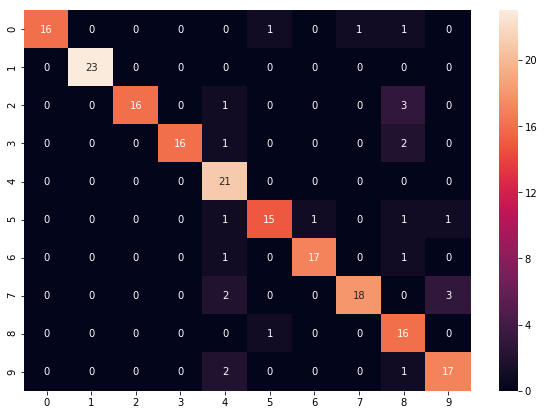

In [35]:
array = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array, range(10), range(10))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot=True)